In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [2]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [3]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import sym_matrix_to_vec


'''
加载提取出来的特征数据集
'''

'''
加载caltech数据
'''
caltech_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_train_features.npy')
caltech_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_train_labels.npy')
caltech_train_features = np.squeeze(caltech_train_features)
#print("caltech_train_features.shape:", caltech_train_features.shape)
#print("caltech_train_labels.shape", caltech_train_labels.shape)

caltech_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_test_features.npy')
caltech_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_test_labels.npy')
caltech_test_features = np.squeeze(caltech_test_features)
#print("caltech_test_features.shape:", caltech_test_features.shape)
#print("caltech_test_labels.shape", caltech_test_labels.shape)


#caltech构建皮尔逊矩阵
caltech_addfeatures_train = []
caltech_addfeatures_test = []

for i in range(30):
    min_train = caltech_train_features[i * 146:(i + 1) * 146]
    caltech_addfeatures_train.append(min_train)

for i in range(7):
    min_test = caltech_test_features[i * 146:(i + 1) * 146]
    caltech_addfeatures_test.append(min_test)

caltech_addfeatures_train = np.squeeze(np.array(caltech_addfeatures_train))
caltech_addfeatures_train = caltech_addfeatures_train.transpose(0,2,1)
caltech_addfeatures_test = np.squeeze(np.array(caltech_addfeatures_test))
caltech_addfeatures_test = caltech_addfeatures_test.transpose(0,2,1)

caltech_addtrain_labels = np.array([0] * 15 + [1] * 15)
caltech_addtest_labels = np.array([0] * 4 + [1] * 3)


conn_est = ConnectivityMeasure(kind='partial correlation')
caltech_addfeatures_train = conn_est.fit_transform(caltech_addfeatures_train)
caltech_addfeatures_train = sym_matrix_to_vec(caltech_addfeatures_train)
caltech_addfeatures_train = fisherscore(caltech_addfeatures_train, caltech_addtrain_labels, 2000)
print('caltech:',caltech_addfeatures_train.shape)

caltech_addfeatures_test = conn_est.fit_transform(caltech_addfeatures_test)
caltech_addfeatures_test = sym_matrix_to_vec(caltech_addfeatures_test)
caltech_addfeatures_test = fisherscore(caltech_addfeatures_test, caltech_addtest_labels, 2000)
print('caltech:',caltech_addfeatures_test.shape)

'''
加载leuven数据
'''
leuven_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_train_features.npy')
leuven_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_train_labels.npy')
leuven_train_features = np.squeeze(leuven_train_features)
#print("leuven_train_features.shape:", leuven_train_features.shape)
#print("leuven_train_labels.shape", leuven_train_labels.shape)

leuven_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_test_features.npy')
leuven_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_test_labels.npy')
leuven_test_features = np.squeeze(leuven_test_features)
#print("leuven_test_features.shape:", leuven_test_features.shape)
#print("leuven_test_labels.shape", leuven_test_labels.shape)

#leuven构建皮尔逊矩阵
leuven_addfeatures_train = []
leuven_addfeatures_test = []

for i in range(52):
    min_train = leuven_train_features[i * 246:(i + 1) * 246]
    leuven_addfeatures_train.append(min_train)

for i in range(11):
    min_test = leuven_test_features[i * 246:(i + 1) * 246]
    leuven_addfeatures_test.append(min_test)

leuven_addfeatures_train = np.squeeze(np.array(leuven_addfeatures_train))
leuven_addfeatures_train = leuven_addfeatures_train.transpose(0,2,1)
leuven_addfeatures_test = np.squeeze(np.array(leuven_addfeatures_test))
leuven_addfeatures_test = leuven_addfeatures_test.transpose(0,2,1)
leuven_addtrain_labels = np.array([0] * 24 + [1] * 28)
leuven_addtest_labels = np.array([0] * 5 + [1] * 6)


#conn_est = ConnectivityMeasure(kind='tangent')
leuven_addfeatures_train = conn_est.fit_transform(leuven_addfeatures_train)
leuven_addfeatures_train = sym_matrix_to_vec(leuven_addfeatures_train)
leuven_addfeatures_train = fisherscore(leuven_addfeatures_train, leuven_addtrain_labels, 2000)
print('leuven:',leuven_addfeatures_train.shape)

leuven_addfeatures_test = conn_est.fit_transform(leuven_addfeatures_test)
leuven_addfeatures_test = sym_matrix_to_vec(leuven_addfeatures_test)
leuven_addfeatures_test = fisherscore(leuven_addfeatures_test, leuven_addtest_labels, 2000)
print('leuven:',leuven_addfeatures_test.shape)

'''
加载nyu数据
'''
nyu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_train_features.npy')
nyu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_train_labels.npy')
nyu_train_features = np.squeeze(nyu_train_features)
# print("ohsu_train_features.shape:", nyu_train_features.shape)
# print("ohsu_train_labels.shape", nyu_train_labels.shape)

nyu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_test_features.npy')
nyu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_test_labels.npy')
nyu_test_features = np.squeeze(nyu_test_features)
# print("ohsu_test_features.shape:", nyu_test_features.shape)
# print("ohsu_test_labels.shape", nyu_test_labels.shape)

#nyu构建皮尔逊矩阵
nyu_addfeatures_train = []
nyu_addfeatures_test = []

for i in range(139):
    min_train = nyu_train_features[i * 176:(i + 1) * 176]
    nyu_addfeatures_train.append(min_train)

for i in range(35):
    min_test = nyu_test_features[i * 176:(i + 1) * 176]
    nyu_addfeatures_test.append(min_test)

nyu_addfeatures_train = np.squeeze(np.array(nyu_addfeatures_train))
nyu_addfeatures_train = nyu_addfeatures_train.transpose(0,2,1)
nyu_addfeatures_test = np.squeeze(np.array(nyu_addfeatures_test))
nyu_addfeatures_test = nyu_addfeatures_test.transpose(0,2,1)
nyu_addtrain_labels = np.array([0] * 60 + [1] * 79)
nyu_addtest_labels = np.array([0] * 15 + [1] * 20)


#conn_est = ConnectivityMeasure(kind='tangent')
nyu_addfeatures_train = conn_est.fit_transform(nyu_addfeatures_train)
nyu_addfeatures_train = sym_matrix_to_vec(nyu_addfeatures_train)
nyu_addfeatures_train = fisherscore(nyu_addfeatures_train, nyu_addtrain_labels, 2000)
print('nyu:',nyu_addfeatures_train.shape)

nyu_addfeatures_test = conn_est.fit_transform(nyu_addfeatures_test)
nyu_addfeatures_test = sym_matrix_to_vec(nyu_addfeatures_test)
nyu_addfeatures_test = fisherscore(nyu_addfeatures_test, nyu_addtest_labels, 2000)
print('nyu:',nyu_addfeatures_test.shape)

'''
加载ohsu数据
'''
ohsu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_train_features.npy')
ohsu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_train_labels.npy')
ohsu_train_features = np.squeeze(ohsu_train_features)
# print("ohsu_train_features.shape:", ohsu_train_features.shape)
# print("ohsu_train_labels.shape", ohsu_train_labels.shape)

ohsu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_test_features.npy')
ohsu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_test_labels.npy')
ohsu_test_features = np.squeeze(ohsu_test_features)
# print("ohsu_test_features.shape:", ohsu_test_features.shape)
# print("ohsu_test_labels.shape", ohsu_test_labels.shape)

#ohsu构建皮尔逊矩阵
ohsu_addfeatures_train = []
ohsu_addfeatures_test = []

for i in range(22):
    min_train = ohsu_train_features[i * 78:(i + 1) * 78]
    ohsu_addfeatures_train.append(min_train)

for i in range(4):
    min_test = ohsu_test_features[i * 78:(i + 1) * 78]
    ohsu_addfeatures_test.append(min_test)

ohsu_addfeatures_train = np.squeeze(np.array(ohsu_addfeatures_train))
ohsu_addfeatures_train = ohsu_addfeatures_train.transpose(0,2,1)
ohsu_addfeatures_test = np.squeeze(np.array(ohsu_addfeatures_test))
ohsu_addfeatures_test = ohsu_addfeatures_test.transpose(0,2,1)
ohsu_addtrain_labels = np.array([0] * 10 + [1] * 12)
ohsu_addtest_labels = np.array([0] * 2 + [1] * 2)


#conn_est = ConnectivityMeasure(kind='tangent')
ohsu_addfeatures_train = conn_est.fit_transform(ohsu_addfeatures_train)
ohsu_addfeatures_train = sym_matrix_to_vec(ohsu_addfeatures_train)
ohsu_addfeatures_train = fisherscore(ohsu_addfeatures_train, ohsu_addtrain_labels, 2000)
print('ohsu:',ohsu_addfeatures_train.shape)

ohsu_addfeatures_test = conn_est.fit_transform(ohsu_addfeatures_test)
ohsu_addfeatures_test = sym_matrix_to_vec(ohsu_addfeatures_test)
ohsu_addfeatures_test = fisherscore(ohsu_addfeatures_test, ohsu_addtest_labels, 2000)
print('ohsu:',ohsu_addfeatures_test.shape)

'''
加载olin数据
'''
olin_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_train_features.npy')
olin_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_train_labels.npy')
olin_train_features = np.squeeze(olin_train_features)
# print("olin_train_features.shape:", olin_train_features.shape)
# print("olin_train_labels.shape", olin_train_labels.shape)

olin_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_test_features.npy')
olin_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_test_labels.npy')
olin_test_features = np.squeeze(olin_test_features)
# print("olin_test_features.shape:", olin_test_features.shape)
# print("olin_test_labels.shape", olin_test_labels.shape)


#olin构建皮尔逊矩阵
olin_addfeatures_train = []
olin_addfeatures_test = []

for i in range(28):
    min_train = olin_train_features[i * 206:(i + 1) * 206]
    olin_addfeatures_train.append(min_train)

for i in range(6):
    min_test = olin_test_features[i * 206:(i + 1) * 206]
    olin_addfeatures_test.append(min_test)

olin_addfeatures_train = np.squeeze(np.array(olin_addfeatures_train))
olin_addfeatures_train = olin_addfeatures_train.transpose(0,2,1)
olin_addfeatures_test = np.squeeze(np.array(olin_addfeatures_test))
olin_addfeatures_test = olin_addfeatures_test.transpose(0,2,1)
olin_addtrain_labels = np.array([0] * 16 + [1] * 12)
olin_addtest_labels = np.array([0] * 3 + [1] * 3)


#conn_est = ConnectivityMeasure(kind='tangent')
olin_addfeatures_train = conn_est.fit_transform(olin_addfeatures_train)
olin_addfeatures_train = sym_matrix_to_vec(olin_addfeatures_train)
olin_addfeatures_train = fisherscore(olin_addfeatures_train, olin_addtrain_labels, 2000)
print('olin:',olin_addfeatures_train.shape)

olin_addfeatures_test = conn_est.fit_transform(olin_addfeatures_test)
olin_addfeatures_test = sym_matrix_to_vec(olin_addfeatures_test)
olin_addfeatures_test = fisherscore(olin_addfeatures_test, olin_addtest_labels, 2000)
print('olin:',olin_addfeatures_test.shape)

'''
加载pitt数据
'''
pitt_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_train_features.npy')
pitt_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_train_labels.npy')
pitt_train_features = np.squeeze(pitt_train_features)
# print("pitt_train_features.shape:", pitt_train_features.shape)
# print("pitt_train_labels.shape", pitt_train_labels.shape)

pitt_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_test_features.npy')
pitt_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_test_labels.npy')
pitt_test_features = np.squeeze(pitt_test_features)
# print("pitt_test_features.shape:", pitt_test_features.shape)
# print("pitt_test_labels.shape", pitt_test_labels.shape)

#pitt构建皮尔逊矩阵
pitt_addfeatures_train = []
pitt_addfeatures_test = []

for i in range(46):
    min_train = pitt_train_features[i * 196:(i + 1) * 196]
    pitt_addfeatures_train.append(min_train)

for i in range(10):
    min_test = pitt_test_features[i * 196:(i + 1) * 196]
    pitt_addfeatures_test.append(min_test)

pitt_addfeatures_train = np.squeeze(np.array(pitt_addfeatures_train))
pitt_addfeatures_train = pitt_addfeatures_train.transpose(0,2,1)
pitt_addfeatures_test = np.squeeze(np.array(pitt_addfeatures_test))
pitt_addfeatures_test = pitt_addfeatures_test.transpose(0,2,1)
pitt_addtrain_labels = np.array([0] * 24 + [1] * 22)
pitt_addtest_labels = np.array([0] * 5 + [1] * 5)


#conn_est = ConnectivityMeasure(kind='tangent')
pitt_addfeatures_train = conn_est.fit_transform(pitt_addfeatures_train)
pitt_addfeatures_train = sym_matrix_to_vec(pitt_addfeatures_train)
pitt_addfeatures_train = fisherscore(pitt_addfeatures_train, pitt_addtrain_labels, 2000)
print('pitt:',pitt_addfeatures_train.shape)

pitt_addfeatures_test = conn_est.fit_transform(pitt_addfeatures_test)
pitt_addfeatures_test = sym_matrix_to_vec(pitt_addfeatures_test)
pitt_addfeatures_test = fisherscore(pitt_addfeatures_test, pitt_addtest_labels, 2000)
print('pitt:',pitt_addfeatures_test.shape)


'''
加载sbl数据
'''
sbl_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_train_features.npy')
sbl_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_train_labels.npy')
sbl_train_features = np.squeeze(sbl_train_features)
# print("sbl_train_features.shape:", sbl_train_features.shape)
# print("sbl_train_labels.shape", sbl_train_labels.shape)

sbl_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_test_features.npy')
sbl_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_test_labels.npy')
sbl_test_features = np.squeeze(sbl_test_features)
# print("sbl_test_features.shape:", sbl_test_features.shape)
# print("sbl_test_labels.shape", sbl_test_labels.shape)

#sbl构建皮尔逊矩阵
sbl_addfeatures_train = []
sbl_addfeatures_test = []

for i in range(24):
    min_train = sbl_train_features[i * 196:(i + 1) * 196]
    sbl_addfeatures_train.append(min_train)

for i in range(5):
    min_test = sbl_test_features[i * 196:(i + 1) * 196]
    sbl_addfeatures_test.append(min_test)

sbl_addfeatures_train = np.squeeze(np.array(sbl_addfeatures_train))
sbl_addfeatures_train = sbl_addfeatures_train.transpose(0,2,1)
sbl_addfeatures_test = np.squeeze(np.array(sbl_addfeatures_test))
sbl_addfeatures_test = sbl_addfeatures_test.transpose(0,2,1)
sbl_addtrain_labels = np.array([0] * 12 + [1] * 12)
sbl_addtest_labels = np.array([0] * 2 + [1] * 3)


#conn_est = ConnectivityMeasure(kind='tangent')
sbl_addfeatures_train = conn_est.fit_transform(sbl_addfeatures_train)
sbl_addfeatures_train = sym_matrix_to_vec(sbl_addfeatures_train)
sbl_addfeatures_train = fisherscore(sbl_addfeatures_train, sbl_addtrain_labels, 2000)
print('sbl:',sbl_addfeatures_train.shape)

sbl_addfeatures_test = conn_est.fit_transform(sbl_addfeatures_test)
sbl_addfeatures_test = sym_matrix_to_vec(sbl_addfeatures_test)
sbl_addfeatures_test = fisherscore(sbl_addfeatures_test, sbl_addtest_labels, 2000)
print('sbl:',sbl_addfeatures_test.shape)

'''
加载sdsu数据
'''
sdsu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_train_features.npy')
sdsu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_train_labels.npy')
sdsu_train_features = np.squeeze(sdsu_train_features)
# print("sdsu_train_features.shape:", sdsu_train_features.shape)
# print("sdsu_train_labels.shape", sdsu_train_labels.shape)

sdsu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_test_features.npy')
sdsu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_test_labels.npy')
sdsu_test_features = np.squeeze(sdsu_test_features)
# print("sdsu_test_features.shape:", sdsu_test_features.shape)
# print("sdsu_test_labels.shape", sdsu_test_labels.shape)

#sdsu构建皮尔逊矩阵
sdsu_addfeatures_train = []
sdsu_addfeatures_test = []

for i in range(30):
    min_train = sdsu_train_features[i * 176:(i + 1) * 176]
    sdsu_addfeatures_train.append(min_train)

for i in range(6):
    min_test = sdsu_test_features[i * 176:(i + 1) * 176]
    sdsu_addfeatures_test.append(min_test)

sdsu_addfeatures_train = np.squeeze(np.array(sdsu_addfeatures_train))
sdsu_addfeatures_train = sdsu_addfeatures_train.transpose(0,2,1)
sdsu_addfeatures_test = np.squeeze(np.array(sdsu_addfeatures_test))
sdsu_addfeatures_test = sdsu_addfeatures_test.transpose(0,2,1)
sdsu_addtrain_labels = np.array([0] * 12 + [1] * 18)
sdsu_addtest_labels = np.array([0] * 2 + [1] * 4)


#conn_est = ConnectivityMeasure(kind='tangent')
sdsu_addfeatures_train = conn_est.fit_transform(sdsu_addfeatures_train)
sdsu_addfeatures_train = sym_matrix_to_vec(sdsu_addfeatures_train)
sdsu_addfeatures_train = fisherscore(sdsu_addfeatures_train, sdsu_addtrain_labels, 2000)
print('sdsu:',sdsu_addfeatures_train.shape)

sdsu_addfeatures_test = conn_est.fit_transform(sdsu_addfeatures_test)
sdsu_addfeatures_test = sym_matrix_to_vec(sdsu_addfeatures_test)
sdsu_addfeatures_test = fisherscore(sdsu_addfeatures_test, sdsu_addtest_labels, 2000)
print('sdsu:',sdsu_addfeatures_test.shape)

'''
加载um数据
'''
um_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_features.npy')
um_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_labels.npy')
um_train_features = np.squeeze(um_train_features)
# print("um_train_features.shape:", um_train_features.shape)
# print("um_train_labels.shape", um_train_labels.shape)

um_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_features.npy')
um_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_labels.npy')
um_test_features = np.squeeze(um_test_features)
# print("um_test_features.shape:", um_test_features.shape)
# print("um_test_labels.shape", um_test_labels.shape)

#um构建皮尔逊矩阵
um_addfeatures_train = []
um_addfeatures_test = []

for i in range(86):
    min_train = um_train_features[i * 296:(i + 1) * 296]
    um_addfeatures_train.append(min_train)

for i in range(20):
    min_test = um_test_features[i * 296:(i + 1) * 296]
    um_addfeatures_test.append(min_test)

um_addfeatures_train = np.squeeze(np.array(um_addfeatures_train))
um_addfeatures_train = um_addfeatures_train.transpose(0,2,1)
um_addfeatures_test = np.squeeze(np.array(um_addfeatures_test))
um_addfeatures_test = um_addfeatures_test.transpose(0,2,1)
um_addtrain_labels = np.array([0] * 43 + [1] * 43)
um_addtest_labels = np.array([0] * 10 + [1] * 10)


#conn_est = ConnectivityMeasure(kind='tangent')
um_addfeatures_train = conn_est.fit_transform(um_addfeatures_train)
um_addfeatures_train = sym_matrix_to_vec(um_addfeatures_train)
um_addfeatures_train = fisherscore(um_addfeatures_train, um_addtrain_labels, 2000)
print('um:',um_addfeatures_train.shape)

um_addfeatures_test = conn_est.fit_transform(um_addfeatures_test)
um_addfeatures_test = sym_matrix_to_vec(um_addfeatures_test)
um_addfeatures_test = fisherscore(um_addfeatures_test, um_addtest_labels, 2000)
print('um:',um_addfeatures_test.shape)

'''
加载usm数据
'''
usm_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_train_features.npy')
usm_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_train_labels.npy')
usm_train_features = np.squeeze(usm_train_features)
# print("usm_train_features.shape:", usm_train_features.shape)
# print("usm_train_labels.shape", usm_train_labels.shape)

usm_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_test_features.npy')
usm_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_test_labels.npy')
usm_test_features = np.squeeze(usm_test_features)
# print("usm_test_features.shape:", usm_test_features.shape)
# print("usm_test_labels.shape", usm_test_labels.shape)

#usm构建皮尔逊矩阵
usm_addfeatures_train = []
usm_addfeatures_test = []

for i in range(57):
    min_train = usm_train_features[i * 236:(i + 1) * 236]
    usm_addfeatures_train.append(min_train)

for i in range(14):
    min_test = usm_test_features[i * 236:(i + 1) * 236]
    usm_addfeatures_test.append(min_test)

usm_addfeatures_train = np.squeeze(np.array(usm_addfeatures_train))
usm_addfeatures_train = usm_addfeatures_train.transpose(0,2,1)
usm_addfeatures_test = np.squeeze(np.array(usm_addfeatures_test))
usm_addfeatures_test = usm_addfeatures_test.transpose(0,2,1)
usm_addtrain_labels = np.array([0] * 37 + [1] * 20)
usm_addtest_labels = np.array([0] * 9 + [1] * 5)


#conn_est = ConnectivityMeasure(kind='tangent')
usm_addfeatures_train = conn_est.fit_transform(usm_addfeatures_train)
usm_addfeatures_train = sym_matrix_to_vec(usm_addfeatures_train)
usm_addfeatures_train = fisherscore(usm_addfeatures_train, usm_addtrain_labels, 2000)
print('usm:',usm_addfeatures_train.shape)

usm_addfeatures_test = conn_est.fit_transform(usm_addfeatures_test)
usm_addfeatures_test = sym_matrix_to_vec(usm_addfeatures_test)
usm_addfeatures_test = fisherscore(usm_addfeatures_test, usm_addtest_labels, 2000)
print('usm:',usm_addfeatures_test.shape)






'''
构建多站点数据集
'''

train_data = np.vstack((caltech_addfeatures_train,
                        leuven_addfeatures_train,
                        nyu_addfeatures_train,
                        ohsu_addfeatures_train,
                        olin_addfeatures_train,
                        pitt_addfeatures_train,
                        sbl_addfeatures_train,
                        sdsu_addfeatures_train,
                        um_addfeatures_train,
                        usm_addfeatures_train,
                        ))
train_label = np.hstack((caltech_addtrain_labels,
                         leuven_addtrain_labels,
                         nyu_addtrain_labels,
                         ohsu_addtrain_labels,
                         olin_addtrain_labels,
                         pitt_addtrain_labels,
                         sbl_addtrain_labels,
                         sdsu_addtrain_labels,
                         um_addtrain_labels,
                         usm_addtrain_labels,
                         ))

test_data = np.vstack((caltech_addfeatures_test,
                       leuven_addfeatures_test,
                       nyu_addfeatures_test,
                       ohsu_addfeatures_test,
                       olin_addfeatures_test,
                       pitt_addfeatures_test,
                       sbl_addfeatures_test,
                       sdsu_addfeatures_test,
                       um_addfeatures_test,
                       usm_addfeatures_test,
                       ))
test_label = np.hstack((caltech_addtest_labels,
                        leuven_addtest_labels,
                        nyu_addtest_labels,
                        ohsu_addtest_labels,
                        olin_addtest_labels,
                        pitt_addtest_labels,
                        sbl_addtest_labels,
                        sdsu_addtest_labels,
                        um_addtest_labels,
                        usm_addtest_labels,
                        ))





print("train_data:", train_data.shape)
print("train_label:", train_label.shape)
print("test_data:", test_data.shape)
print("test_label:", test_label.shape)



data = np.vstack((train_data, test_data))
label = np.hstack((train_label,test_label))
print('data', data.shape)
print('label', label.shape)


caltech: (30, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


caltech: (7, 2000)
leuven: (52, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


leuven: (11, 2000)
nyu: (139, 2000)
nyu: (35, 2000)
ohsu: (22, 2000)
ohsu: (4, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


olin: (28, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


olin: (6, 2000)
pitt: (46, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


pitt: (10, 2000)
sbl: (24, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


sbl: (5, 2000)
sdsu: (30, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


sdsu: (6, 2000)
um: (86, 2000)
um: (20, 2000)
usm: (57, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


usm: (14, 2000)
train_data: (514, 2000)
train_label: (514,)
test_data: (118, 2000)
test_label: (118,)
data (632, 2000)
label (632,)


In [4]:
from sklearn.model_selection import train_test_split
x_val, x_test, y_val, y_test = train_test_split(test_data, test_label, test_size=0.5)
new_data = np.vstack((x_test, train_data))
new_label = np.hstack((y_test, train_label))
x_train, x_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.2)
print(x_val.shape)
print(x_train.shape)
print(x_test.shape)

(59, 2000)
(458, 2000)
(115, 2000)


In [11]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, MaxPooling1D
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import train_test_split

# mlps = []
# mlp = MLPClassifier(hidden_layer_sizes=(1000,200), max_iter=2000, alpha=1e-4,
#                     solver='sgd', verbose=100,
#                     learning_rate_init=0.01, n_iter_no_change=1000)

# mlp.fit(x_train, y_train)
# mlp.score(x_test, y_test)

model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=2000))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD()
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

his = model.fit(x=x_train, y=y_train, batch_size=32, epochs=2000, shuffle=True, verbose=1, 
               validation_data=(x_val,y_val))

Train on 505 samples, validate on 59 samples
Epoch 1/2000
505/505 [==============================] - 0s 588us/step - loss: 0.6969 - accuracy: 0.5050 - val_loss: 0.6896 - val_accuracy: 0.6102
Epoch 2/2000
505/505 [==============================] - 0s 346us/step - loss: 0.7073 - accuracy: 0.4931 - val_loss: 0.6879 - val_accuracy: 0.5254
Epoch 3/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6901 - accuracy: 0.4851 - val_loss: 0.6876 - val_accuracy: 0.5254
Epoch 4/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6943 - accuracy: 0.5129 - val_loss: 0.6863 - val_accuracy: 0.5085
Epoch 5/2000
505/505 [==============================] - 0s 354us/step - loss: 0.7012 - accuracy: 0.5248 - val_loss: 0.6861 - val_accuracy: 0.5254
Epoch 6/2000
505/505 [==============================] - 0s 359us/step - loss: 0.7055 - accuracy: 0.5010 - val_loss: 0.6863 - val_accuracy: 0.5254
Epoch 7/2000
505/505 [==============================] - 0s 355us/step - loss: 0

505/505 [==============================] - 0s 342us/step - loss: 0.6823 - accuracy: 0.5505 - val_loss: 0.6842 - val_accuracy: 0.5254
Epoch 57/2000
505/505 [==============================] - 0s 348us/step - loss: 0.6870 - accuracy: 0.5485 - val_loss: 0.6841 - val_accuracy: 0.5254
Epoch 58/2000
505/505 [==============================] - 0s 350us/step - loss: 0.6827 - accuracy: 0.5545 - val_loss: 0.6839 - val_accuracy: 0.5254
Epoch 59/2000
505/505 [==============================] - 0s 344us/step - loss: 0.6824 - accuracy: 0.5545 - val_loss: 0.6841 - val_accuracy: 0.5254
Epoch 60/2000
505/505 [==============================] - 0s 342us/step - loss: 0.6839 - accuracy: 0.5446 - val_loss: 0.6838 - val_accuracy: 0.5254
Epoch 61/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6900 - accuracy: 0.5168 - val_loss: 0.6839 - val_accuracy: 0.5254
Epoch 62/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6878 - accuracy: 0.5386 - val_loss: 0.6835 - val_ac

Epoch 112/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6792 - accuracy: 0.5564 - val_loss: 0.6817 - val_accuracy: 0.5254
Epoch 113/2000
505/505 [==============================] - 0s 357us/step - loss: 0.6819 - accuracy: 0.5564 - val_loss: 0.6817 - val_accuracy: 0.5254
Epoch 114/2000
505/505 [==============================] - 0s 350us/step - loss: 0.6856 - accuracy: 0.5446 - val_loss: 0.6816 - val_accuracy: 0.5254
Epoch 115/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6852 - accuracy: 0.5505 - val_loss: 0.6816 - val_accuracy: 0.5254
Epoch 116/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6944 - accuracy: 0.5228 - val_loss: 0.6814 - val_accuracy: 0.5254
Epoch 117/2000
505/505 [==============================] - 0s 348us/step - loss: 0.6818 - accuracy: 0.5624 - val_loss: 0.6814 - val_accuracy: 0.5254
Epoch 118/2000
505/505 [==============================] - 0s 344us/step - loss: 0.6818 - accuracy: 0.5485 - val_

505/505 [==============================] - 0s 350us/step - loss: 0.6743 - accuracy: 0.5762 - val_loss: 0.6795 - val_accuracy: 0.5254
Epoch 168/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6797 - accuracy: 0.5446 - val_loss: 0.6795 - val_accuracy: 0.5254
Epoch 169/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6809 - accuracy: 0.5485 - val_loss: 0.6794 - val_accuracy: 0.5254
Epoch 170/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6785 - accuracy: 0.5347 - val_loss: 0.6794 - val_accuracy: 0.5254
Epoch 171/2000
505/505 [==============================] - 0s 357us/step - loss: 0.6827 - accuracy: 0.5564 - val_loss: 0.6795 - val_accuracy: 0.5254
Epoch 172/2000
505/505 [==============================] - 0s 354us/step - loss: 0.6757 - accuracy: 0.5644 - val_loss: 0.6792 - val_accuracy: 0.5254
Epoch 173/2000
505/505 [==============================] - 0s 336us/step - loss: 0.6808 - accuracy: 0.5584 - val_loss: 0.6792 - 

505/505 [==============================] - 0s 348us/step - loss: 0.6745 - accuracy: 0.5525 - val_loss: 0.6761 - val_accuracy: 0.5254
Epoch 223/2000
505/505 [==============================] - 0s 352us/step - loss: 0.6778 - accuracy: 0.5545 - val_loss: 0.6760 - val_accuracy: 0.5254
Epoch 224/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6732 - accuracy: 0.5663 - val_loss: 0.6759 - val_accuracy: 0.5254
Epoch 225/2000
505/505 [==============================] - 0s 344us/step - loss: 0.6716 - accuracy: 0.5604 - val_loss: 0.6759 - val_accuracy: 0.5254
Epoch 226/2000
505/505 [==============================] - 0s 330us/step - loss: 0.6750 - accuracy: 0.5525 - val_loss: 0.6762 - val_accuracy: 0.5254
Epoch 227/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6797 - accuracy: 0.5564 - val_loss: 0.6761 - val_accuracy: 0.5254
Epoch 228/2000
505/505 [==============================] - 0s 336us/step - loss: 0.6795 - accuracy: 0.5426 - val_loss: 0.6761 - 

505/505 [==============================] - 0s 338us/step - loss: 0.6717 - accuracy: 0.5624 - val_loss: 0.6729 - val_accuracy: 0.5254
Epoch 278/2000
505/505 [==============================] - 0s 342us/step - loss: 0.6671 - accuracy: 0.5802 - val_loss: 0.6730 - val_accuracy: 0.5254
Epoch 279/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6701 - accuracy: 0.5624 - val_loss: 0.6728 - val_accuracy: 0.5254
Epoch 280/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6758 - accuracy: 0.5703 - val_loss: 0.6726 - val_accuracy: 0.5254
Epoch 281/2000
505/505 [==============================] - 0s 336us/step - loss: 0.6781 - accuracy: 0.5525 - val_loss: 0.6723 - val_accuracy: 0.5254
Epoch 282/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6670 - accuracy: 0.5624 - val_loss: 0.6723 - val_accuracy: 0.5254
Epoch 283/2000
505/505 [==============================] - 0s 352us/step - loss: 0.6738 - accuracy: 0.5564 - val_loss: 0.6723 - 

505/505 [==============================] - 0s 346us/step - loss: 0.6653 - accuracy: 0.5822 - val_loss: 0.6677 - val_accuracy: 0.5424
Epoch 333/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6702 - accuracy: 0.5743 - val_loss: 0.6677 - val_accuracy: 0.5424
Epoch 334/2000
505/505 [==============================] - 0s 344us/step - loss: 0.6612 - accuracy: 0.5941 - val_loss: 0.6676 - val_accuracy: 0.5424
Epoch 335/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6700 - accuracy: 0.5683 - val_loss: 0.6678 - val_accuracy: 0.5085
Epoch 336/2000
505/505 [==============================] - 0s 342us/step - loss: 0.6615 - accuracy: 0.5802 - val_loss: 0.6680 - val_accuracy: 0.5085
Epoch 337/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6659 - accuracy: 0.5743 - val_loss: 0.6677 - val_accuracy: 0.5085
Epoch 338/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6632 - accuracy: 0.5505 - val_loss: 0.6678 - 

505/505 [==============================] - 0s 330us/step - loss: 0.6536 - accuracy: 0.6040 - val_loss: 0.6612 - val_accuracy: 0.5424
Epoch 388/2000
505/505 [==============================] - 0s 342us/step - loss: 0.6614 - accuracy: 0.6099 - val_loss: 0.6611 - val_accuracy: 0.5593
Epoch 389/2000
505/505 [==============================] - 0s 361us/step - loss: 0.6594 - accuracy: 0.6139 - val_loss: 0.6606 - val_accuracy: 0.5254
Epoch 390/2000
505/505 [==============================] - 0s 354us/step - loss: 0.6578 - accuracy: 0.5881 - val_loss: 0.6601 - val_accuracy: 0.5424
Epoch 391/2000
505/505 [==============================] - 0s 352us/step - loss: 0.6566 - accuracy: 0.5960 - val_loss: 0.6597 - val_accuracy: 0.5424
Epoch 392/2000
505/505 [==============================] - 0s 354us/step - loss: 0.6566 - accuracy: 0.6119 - val_loss: 0.6594 - val_accuracy: 0.5424
Epoch 393/2000
505/505 [==============================] - 0s 350us/step - loss: 0.6653 - accuracy: 0.6139 - val_loss: 0.6597 - 

505/505 [==============================] - 0s 342us/step - loss: 0.6556 - accuracy: 0.6455 - val_loss: 0.6504 - val_accuracy: 0.6271
Epoch 443/2000
505/505 [==============================] - 0s 354us/step - loss: 0.6493 - accuracy: 0.6812 - val_loss: 0.6500 - val_accuracy: 0.6271
Epoch 444/2000
505/505 [==============================] - 0s 336us/step - loss: 0.6492 - accuracy: 0.6812 - val_loss: 0.6499 - val_accuracy: 0.6271
Epoch 445/2000
505/505 [==============================] - 0s 350us/step - loss: 0.6435 - accuracy: 0.6713 - val_loss: 0.6495 - val_accuracy: 0.6271
Epoch 446/2000
505/505 [==============================] - 0s 348us/step - loss: 0.6413 - accuracy: 0.6752 - val_loss: 0.6489 - val_accuracy: 0.6271
Epoch 447/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6469 - accuracy: 0.6574 - val_loss: 0.6487 - val_accuracy: 0.6271
Epoch 448/2000
505/505 [==============================] - 0s 342us/step - loss: 0.6488 - accuracy: 0.6851 - val_loss: 0.6487 - 

505/505 [==============================] - 0s 344us/step - loss: 0.6247 - accuracy: 0.7149 - val_loss: 0.6335 - val_accuracy: 0.6780
Epoch 498/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6303 - accuracy: 0.7505 - val_loss: 0.6352 - val_accuracy: 0.6780
Epoch 499/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6372 - accuracy: 0.7188 - val_loss: 0.6341 - val_accuracy: 0.6780
Epoch 500/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6335 - accuracy: 0.7109 - val_loss: 0.6335 - val_accuracy: 0.6780
Epoch 501/2000
505/505 [==============================] - 0s 338us/step - loss: 0.6220 - accuracy: 0.7446 - val_loss: 0.6323 - val_accuracy: 0.7797
Epoch 502/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6277 - accuracy: 0.7129 - val_loss: 0.6317 - val_accuracy: 0.7966
Epoch 503/2000
505/505 [==============================] - 0s 352us/step - loss: 0.6266 - accuracy: 0.7327 - val_loss: 0.6313 - 

505/505 [==============================] - 0s 354us/step - loss: 0.5935 - accuracy: 0.7980 - val_loss: 0.6086 - val_accuracy: 0.9153
Epoch 553/2000
505/505 [==============================] - 0s 357us/step - loss: 0.5949 - accuracy: 0.7762 - val_loss: 0.6064 - val_accuracy: 0.9492
Epoch 554/2000
505/505 [==============================] - 0s 365us/step - loss: 0.6018 - accuracy: 0.7960 - val_loss: 0.6063 - val_accuracy: 0.8644
Epoch 555/2000
505/505 [==============================] - 0s 354us/step - loss: 0.5994 - accuracy: 0.8040 - val_loss: 0.6069 - val_accuracy: 0.8814
Epoch 556/2000
505/505 [==============================] - 0s 340us/step - loss: 0.6071 - accuracy: 0.7861 - val_loss: 0.6065 - val_accuracy: 0.7458
Epoch 557/2000
505/505 [==============================] - 0s 346us/step - loss: 0.6039 - accuracy: 0.7663 - val_loss: 0.6057 - val_accuracy: 0.8305
Epoch 558/2000
505/505 [==============================] - 0s 367us/step - loss: 0.5982 - accuracy: 0.7921 - val_loss: 0.6038 - 

505/505 [==============================] - 0s 350us/step - loss: 0.5652 - accuracy: 0.8059 - val_loss: 0.5687 - val_accuracy: 0.9492
Epoch 608/2000
505/505 [==============================] - 0s 363us/step - loss: 0.5662 - accuracy: 0.8059 - val_loss: 0.5717 - val_accuracy: 0.9153
Epoch 609/2000
505/505 [==============================] - 0s 344us/step - loss: 0.5646 - accuracy: 0.8119 - val_loss: 0.5681 - val_accuracy: 0.9153
Epoch 610/2000
505/505 [==============================] - 0s 355us/step - loss: 0.5527 - accuracy: 0.8218 - val_loss: 0.5660 - val_accuracy: 0.9322
Epoch 611/2000
505/505 [==============================] - 0s 361us/step - loss: 0.5601 - accuracy: 0.8178 - val_loss: 0.5693 - val_accuracy: 0.8136
Epoch 612/2000
505/505 [==============================] - 0s 357us/step - loss: 0.5617 - accuracy: 0.7941 - val_loss: 0.5650 - val_accuracy: 0.9153
Epoch 613/2000
505/505 [==============================] - 0s 377us/step - loss: 0.5560 - accuracy: 0.8139 - val_loss: 0.5661 - 

505/505 [==============================] - 0s 354us/step - loss: 0.5128 - accuracy: 0.8099 - val_loss: 0.5151 - val_accuracy: 0.9492
Epoch 663/2000
505/505 [==============================] - 0s 344us/step - loss: 0.5100 - accuracy: 0.8356 - val_loss: 0.5151 - val_accuracy: 0.9492
Epoch 664/2000
505/505 [==============================] - 0s 346us/step - loss: 0.5142 - accuracy: 0.8218 - val_loss: 0.5143 - val_accuracy: 0.9153
Epoch 665/2000
505/505 [==============================] - 0s 348us/step - loss: 0.5114 - accuracy: 0.8198 - val_loss: 0.5107 - val_accuracy: 0.9492
Epoch 666/2000
505/505 [==============================] - 0s 344us/step - loss: 0.5034 - accuracy: 0.8535 - val_loss: 0.5154 - val_accuracy: 0.7966
Epoch 667/2000
505/505 [==============================] - 0s 350us/step - loss: 0.4942 - accuracy: 0.8317 - val_loss: 0.5098 - val_accuracy: 0.9153
Epoch 668/2000
505/505 [==============================] - 0s 342us/step - loss: 0.5045 - accuracy: 0.8257 - val_loss: 0.5129 - 

505/505 [==============================] - 0s 348us/step - loss: 0.4549 - accuracy: 0.8337 - val_loss: 0.4638 - val_accuracy: 0.7797
Epoch 718/2000
505/505 [==============================] - 0s 348us/step - loss: 0.4458 - accuracy: 0.8277 - val_loss: 0.4545 - val_accuracy: 0.9153
Epoch 719/2000
505/505 [==============================] - 0s 344us/step - loss: 0.4577 - accuracy: 0.8396 - val_loss: 0.4496 - val_accuracy: 0.9492
Epoch 720/2000
505/505 [==============================] - 0s 350us/step - loss: 0.4524 - accuracy: 0.8099 - val_loss: 0.4483 - val_accuracy: 0.9492
Epoch 721/2000
505/505 [==============================] - 0s 348us/step - loss: 0.4385 - accuracy: 0.8297 - val_loss: 0.4484 - val_accuracy: 0.9492
Epoch 722/2000
505/505 [==============================] - 0s 354us/step - loss: 0.4541 - accuracy: 0.8218 - val_loss: 0.4698 - val_accuracy: 0.7797
Epoch 723/2000
505/505 [==============================] - 0s 352us/step - loss: 0.4444 - accuracy: 0.8277 - val_loss: 0.4480 - 

505/505 [==============================] - 0s 352us/step - loss: 0.3956 - accuracy: 0.8396 - val_loss: 0.3954 - val_accuracy: 0.9153
Epoch 773/2000
505/505 [==============================] - 0s 350us/step - loss: 0.3968 - accuracy: 0.8376 - val_loss: 0.4023 - val_accuracy: 0.8136
Epoch 774/2000
505/505 [==============================] - 0s 344us/step - loss: 0.3997 - accuracy: 0.8396 - val_loss: 0.3877 - val_accuracy: 0.9153
Epoch 775/2000
505/505 [==============================] - 0s 346us/step - loss: 0.3979 - accuracy: 0.8416 - val_loss: 0.3932 - val_accuracy: 0.8644
Epoch 776/2000
505/505 [==============================] - 0s 359us/step - loss: 0.3916 - accuracy: 0.8337 - val_loss: 0.4120 - val_accuracy: 0.7797
Epoch 777/2000
505/505 [==============================] - 0s 359us/step - loss: 0.3936 - accuracy: 0.8436 - val_loss: 0.3883 - val_accuracy: 0.9153
Epoch 778/2000
505/505 [==============================] - 0s 354us/step - loss: 0.3976 - accuracy: 0.8416 - val_loss: 0.3850 - 

Epoch 827/2000
505/505 [==============================] - 0s 350us/step - loss: 0.3664 - accuracy: 0.8356 - val_loss: 0.3413 - val_accuracy: 0.8983
Epoch 828/2000
505/505 [==============================] - 0s 352us/step - loss: 0.3699 - accuracy: 0.8396 - val_loss: 0.3402 - val_accuracy: 0.9153
Epoch 829/2000
505/505 [==============================] - 0s 348us/step - loss: 0.3762 - accuracy: 0.8238 - val_loss: 0.3804 - val_accuracy: 0.8136
Epoch 830/2000
505/505 [==============================] - 0s 348us/step - loss: 0.3495 - accuracy: 0.8495 - val_loss: 0.3950 - val_accuracy: 0.7966
Epoch 831/2000
505/505 [==============================] - 0s 350us/step - loss: 0.3473 - accuracy: 0.8733 - val_loss: 0.3381 - val_accuracy: 0.9492
Epoch 832/2000
505/505 [==============================] - 0s 405us/step - loss: 0.3586 - accuracy: 0.8356 - val_loss: 0.3323 - val_accuracy: 0.9492
Epoch 833/2000
505/505 [==============================] - 0s 407us/step - loss: 0.3671 - accuracy: 0.8158 - val_

505/505 [==============================] - 0s 346us/step - loss: 0.3396 - accuracy: 0.8356 - val_loss: 0.3414 - val_accuracy: 0.7797
Epoch 883/2000
505/505 [==============================] - 0s 342us/step - loss: 0.3231 - accuracy: 0.8515 - val_loss: 0.3021 - val_accuracy: 0.9153
Epoch 884/2000
505/505 [==============================] - 0s 344us/step - loss: 0.3329 - accuracy: 0.8475 - val_loss: 0.2996 - val_accuracy: 0.9492
Epoch 885/2000
505/505 [==============================] - 0s 348us/step - loss: 0.3372 - accuracy: 0.8317 - val_loss: 0.3051 - val_accuracy: 0.9322
Epoch 886/2000
505/505 [==============================] - 0s 326us/step - loss: 0.3200 - accuracy: 0.8535 - val_loss: 0.2982 - val_accuracy: 0.9492
Epoch 887/2000
505/505 [==============================] - 0s 334us/step - loss: 0.3283 - accuracy: 0.8535 - val_loss: 0.3251 - val_accuracy: 0.8136
Epoch 888/2000
505/505 [==============================] - 0s 338us/step - loss: 0.3287 - accuracy: 0.8535 - val_loss: 0.3756 - 

505/505 [==============================] - 0s 340us/step - loss: 0.3131 - accuracy: 0.8475 - val_loss: 0.2689 - val_accuracy: 0.9322
Epoch 938/2000
505/505 [==============================] - 0s 348us/step - loss: 0.3257 - accuracy: 0.8297 - val_loss: 0.2763 - val_accuracy: 0.9492
Epoch 939/2000
505/505 [==============================] - 0s 346us/step - loss: 0.3077 - accuracy: 0.8396 - val_loss: 0.3663 - val_accuracy: 0.8136
Epoch 940/2000
505/505 [==============================] - 0s 346us/step - loss: 0.3291 - accuracy: 0.8119 - val_loss: 0.2694 - val_accuracy: 0.9322
Epoch 941/2000
505/505 [==============================] - 0s 346us/step - loss: 0.3135 - accuracy: 0.8356 - val_loss: 0.3129 - val_accuracy: 0.8136
Epoch 942/2000
505/505 [==============================] - 0s 357us/step - loss: 0.3118 - accuracy: 0.8297 - val_loss: 0.2879 - val_accuracy: 0.8983
Epoch 943/2000
505/505 [==============================] - 0s 373us/step - loss: 0.3118 - accuracy: 0.8455 - val_loss: 0.2890 - 

505/505 [==============================] - 0s 354us/step - loss: 0.2946 - accuracy: 0.8515 - val_loss: 0.2644 - val_accuracy: 0.8983
Epoch 993/2000
505/505 [==============================] - 0s 350us/step - loss: 0.2998 - accuracy: 0.8554 - val_loss: 0.2914 - val_accuracy: 0.8136
Epoch 994/2000
505/505 [==============================] - 0s 352us/step - loss: 0.2815 - accuracy: 0.8634 - val_loss: 0.3069 - val_accuracy: 0.8136
Epoch 995/2000
505/505 [==============================] - 0s 348us/step - loss: 0.2875 - accuracy: 0.8594 - val_loss: 0.2576 - val_accuracy: 0.8983
Epoch 996/2000
505/505 [==============================] - 0s 415us/step - loss: 0.2986 - accuracy: 0.8574 - val_loss: 0.2382 - val_accuracy: 0.9492
Epoch 997/2000
505/505 [==============================] - 0s 381us/step - loss: 0.2865 - accuracy: 0.8475 - val_loss: 0.2863 - val_accuracy: 0.8136
Epoch 998/2000
505/505 [==============================] - 0s 365us/step - loss: 0.3030 - accuracy: 0.8416 - val_loss: 0.2323 - 

505/505 [==============================] - 0s 354us/step - loss: 0.2928 - accuracy: 0.8455 - val_loss: 0.2350 - val_accuracy: 0.9492
Epoch 1048/2000
505/505 [==============================] - 0s 344us/step - loss: 0.2877 - accuracy: 0.8515 - val_loss: 0.2297 - val_accuracy: 0.9492
Epoch 1049/2000
505/505 [==============================] - 0s 344us/step - loss: 0.2928 - accuracy: 0.8337 - val_loss: 0.2422 - val_accuracy: 0.9492
Epoch 1050/2000
505/505 [==============================] - 0s 344us/step - loss: 0.2991 - accuracy: 0.8376 - val_loss: 0.2831 - val_accuracy: 0.8136
Epoch 1051/2000
505/505 [==============================] - 0s 342us/step - loss: 0.2909 - accuracy: 0.8475 - val_loss: 0.2366 - val_accuracy: 0.9492
Epoch 1052/2000
505/505 [==============================] - 0s 344us/step - loss: 0.2862 - accuracy: 0.8436 - val_loss: 0.2867 - val_accuracy: 0.8136
Epoch 1053/2000
505/505 [==============================] - 0s 346us/step - loss: 0.2919 - accuracy: 0.8376 - val_loss: 0.2

505/505 [==============================] - 0s 328us/step - loss: 0.2974 - accuracy: 0.8396 - val_loss: 0.3149 - val_accuracy: 0.8136
Epoch 1103/2000
505/505 [==============================] - 0s 324us/step - loss: 0.2951 - accuracy: 0.8436 - val_loss: 0.2238 - val_accuracy: 0.9492
Epoch 1104/2000
505/505 [==============================] - 0s 326us/step - loss: 0.2880 - accuracy: 0.8376 - val_loss: 0.2769 - val_accuracy: 0.8305
Epoch 1105/2000
505/505 [==============================] - 0s 322us/step - loss: 0.2901 - accuracy: 0.8594 - val_loss: 0.2211 - val_accuracy: 0.9492
Epoch 1106/2000
505/505 [==============================] - 0s 328us/step - loss: 0.2832 - accuracy: 0.8495 - val_loss: 0.3405 - val_accuracy: 0.7797
Epoch 1107/2000
505/505 [==============================] - 0s 324us/step - loss: 0.2775 - accuracy: 0.8515 - val_loss: 0.2355 - val_accuracy: 0.9492
Epoch 1108/2000
505/505 [==============================] - 0s 322us/step - loss: 0.2782 - accuracy: 0.8495 - val_loss: 0.2

505/505 [==============================] - 0s 308us/step - loss: 0.2798 - accuracy: 0.8455 - val_loss: 0.2179 - val_accuracy: 0.9492
Epoch 1158/2000
505/505 [==============================] - 0s 312us/step - loss: 0.2893 - accuracy: 0.8376 - val_loss: 0.2108 - val_accuracy: 0.9492
Epoch 1159/2000
505/505 [==============================] - 0s 314us/step - loss: 0.2825 - accuracy: 0.8376 - val_loss: 0.2546 - val_accuracy: 0.8644
Epoch 1160/2000
505/505 [==============================] - 0s 308us/step - loss: 0.2910 - accuracy: 0.8317 - val_loss: 0.2407 - val_accuracy: 0.9153
Epoch 1161/2000
505/505 [==============================] - 0s 310us/step - loss: 0.2866 - accuracy: 0.8475 - val_loss: 0.2506 - val_accuracy: 0.8475
Epoch 1162/2000
505/505 [==============================] - 0s 314us/step - loss: 0.2733 - accuracy: 0.8416 - val_loss: 0.2143 - val_accuracy: 0.9322
Epoch 1163/2000
505/505 [==============================] - 0s 312us/step - loss: 0.2718 - accuracy: 0.8713 - val_loss: 0.2

505/505 [==============================] - 0s 596us/step - loss: 0.2667 - accuracy: 0.8455 - val_loss: 0.1953 - val_accuracy: 0.9492
Epoch 1213/2000
505/505 [==============================] - 0s 594us/step - loss: 0.2671 - accuracy: 0.8495 - val_loss: 0.3346 - val_accuracy: 0.8136
Epoch 1214/2000
505/505 [==============================] - 0s 591us/step - loss: 0.2727 - accuracy: 0.8554 - val_loss: 0.2305 - val_accuracy: 0.9153
Epoch 1215/2000
505/505 [==============================] - 0s 642us/step - loss: 0.2706 - accuracy: 0.8356 - val_loss: 0.1949 - val_accuracy: 0.9492
Epoch 1216/2000
505/505 [==============================] - 0s 733us/step - loss: 0.2696 - accuracy: 0.8455 - val_loss: 0.2660 - val_accuracy: 0.8136
Epoch 1217/2000
505/505 [==============================] - 0s 604us/step - loss: 0.2630 - accuracy: 0.8574 - val_loss: 0.1993 - val_accuracy: 0.9492
Epoch 1218/2000
505/505 [==============================] - 0s 636us/step - loss: 0.2629 - accuracy: 0.8614 - val_loss: 0.2

505/505 [==============================] - 0s 561us/step - loss: 0.2674 - accuracy: 0.8396 - val_loss: 0.2001 - val_accuracy: 0.9492
Epoch 1268/2000
505/505 [==============================] - 0s 587us/step - loss: 0.2764 - accuracy: 0.8653 - val_loss: 0.2005 - val_accuracy: 0.9492
Epoch 1269/2000
505/505 [==============================] - 0s 581us/step - loss: 0.2666 - accuracy: 0.8653 - val_loss: 0.1886 - val_accuracy: 0.9492
Epoch 1270/2000
505/505 [==============================] - 0s 555us/step - loss: 0.2722 - accuracy: 0.8554 - val_loss: 0.2064 - val_accuracy: 0.9492
Epoch 1271/2000
505/505 [==============================] - 0s 587us/step - loss: 0.2668 - accuracy: 0.8535 - val_loss: 0.2094 - val_accuracy: 0.9492
Epoch 1272/2000
505/505 [==============================] - 0s 559us/step - loss: 0.2681 - accuracy: 0.8317 - val_loss: 0.2481 - val_accuracy: 0.8305
Epoch 1273/2000
505/505 [==============================] - 0s 563us/step - loss: 0.2700 - accuracy: 0.8495 - val_loss: 0.1

505/505 [==============================] - 0s 569us/step - loss: 0.2632 - accuracy: 0.8614 - val_loss: 0.1901 - val_accuracy: 0.9492
Epoch 1323/2000
505/505 [==============================] - 0s 587us/step - loss: 0.2717 - accuracy: 0.8535 - val_loss: 0.2079 - val_accuracy: 0.9322
Epoch 1324/2000
505/505 [==============================] - 0s 600us/step - loss: 0.2624 - accuracy: 0.8594 - val_loss: 0.1864 - val_accuracy: 0.9492
Epoch 1325/2000
505/505 [==============================] - 0s 579us/step - loss: 0.2649 - accuracy: 0.8535 - val_loss: 0.1889 - val_accuracy: 0.9492
Epoch 1326/2000
505/505 [==============================] - 0s 571us/step - loss: 0.2642 - accuracy: 0.8634 - val_loss: 0.1856 - val_accuracy: 0.9492
Epoch 1327/2000
505/505 [==============================] - 0s 583us/step - loss: 0.2755 - accuracy: 0.8376 - val_loss: 0.1959 - val_accuracy: 0.9492
Epoch 1328/2000
505/505 [==============================] - 0s 579us/step - loss: 0.2735 - accuracy: 0.8475 - val_loss: 0.1

505/505 [==============================] - 0s 600us/step - loss: 0.2697 - accuracy: 0.8455 - val_loss: 0.1997 - val_accuracy: 0.9492
Epoch 1378/2000
505/505 [==============================] - 0s 598us/step - loss: 0.2744 - accuracy: 0.8396 - val_loss: 0.2056 - val_accuracy: 0.9322
Epoch 1379/2000
505/505 [==============================] - 0s 587us/step - loss: 0.2587 - accuracy: 0.8634 - val_loss: 0.1773 - val_accuracy: 0.9492
Epoch 1380/2000
505/505 [==============================] - 0s 581us/step - loss: 0.2688 - accuracy: 0.8535 - val_loss: 0.1801 - val_accuracy: 0.9492
Epoch 1381/2000
505/505 [==============================] - 0s 569us/step - loss: 0.2558 - accuracy: 0.8495 - val_loss: 0.1939 - val_accuracy: 0.9492
Epoch 1382/2000
505/505 [==============================] - 0s 573us/step - loss: 0.2644 - accuracy: 0.8475 - val_loss: 0.1979 - val_accuracy: 0.9492
Epoch 1383/2000
505/505 [==============================] - 0s 620us/step - loss: 0.2612 - accuracy: 0.8436 - val_loss: 0.1

505/505 [==============================] - 0s 602us/step - loss: 0.2588 - accuracy: 0.8653 - val_loss: 0.1648 - val_accuracy: 0.9492
Epoch 1433/2000
505/505 [==============================] - 0s 583us/step - loss: 0.2595 - accuracy: 0.8535 - val_loss: 0.1627 - val_accuracy: 0.9492
Epoch 1434/2000
505/505 [==============================] - 0s 563us/step - loss: 0.2650 - accuracy: 0.8436 - val_loss: 0.1639 - val_accuracy: 0.9322
Epoch 1435/2000
505/505 [==============================] - 0s 596us/step - loss: 0.2575 - accuracy: 0.8475 - val_loss: 0.1625 - val_accuracy: 0.9492
Epoch 1436/2000
505/505 [==============================] - 0s 600us/step - loss: 0.2606 - accuracy: 0.8574 - val_loss: 0.1611 - val_accuracy: 0.9492
Epoch 1437/2000
505/505 [==============================] - 0s 592us/step - loss: 0.2555 - accuracy: 0.8515 - val_loss: 0.1706 - val_accuracy: 0.9492
Epoch 1438/2000
505/505 [==============================] - 0s 598us/step - loss: 0.2541 - accuracy: 0.8693 - val_loss: 0.1

505/505 [==============================] - 0s 579us/step - loss: 0.2672 - accuracy: 0.8455 - val_loss: 0.1581 - val_accuracy: 0.9492
Epoch 1488/2000
505/505 [==============================] - 0s 573us/step - loss: 0.2493 - accuracy: 0.8752 - val_loss: 0.1583 - val_accuracy: 0.9492
Epoch 1489/2000
505/505 [==============================] - 0s 575us/step - loss: 0.2539 - accuracy: 0.8495 - val_loss: 0.1561 - val_accuracy: 0.9492
Epoch 1490/2000
505/505 [==============================] - 0s 575us/step - loss: 0.2596 - accuracy: 0.8614 - val_loss: 0.1536 - val_accuracy: 0.9492
Epoch 1491/2000
505/505 [==============================] - 0s 569us/step - loss: 0.2483 - accuracy: 0.8693 - val_loss: 0.1566 - val_accuracy: 0.9492
Epoch 1492/2000
505/505 [==============================] - 0s 577us/step - loss: 0.2615 - accuracy: 0.8515 - val_loss: 0.1556 - val_accuracy: 0.9492
Epoch 1493/2000
505/505 [==============================] - 0s 592us/step - loss: 0.2536 - accuracy: 0.8455 - val_loss: 0.1

505/505 [==============================] - 0s 575us/step - loss: 0.2501 - accuracy: 0.8475 - val_loss: 0.1563 - val_accuracy: 0.9492
Epoch 1543/2000
505/505 [==============================] - 0s 583us/step - loss: 0.2537 - accuracy: 0.8554 - val_loss: 0.1442 - val_accuracy: 0.9492
Epoch 1544/2000
505/505 [==============================] - 0s 577us/step - loss: 0.2474 - accuracy: 0.8535 - val_loss: 0.1521 - val_accuracy: 0.9492
Epoch 1545/2000
505/505 [==============================] - 0s 602us/step - loss: 0.2538 - accuracy: 0.8653 - val_loss: 0.1430 - val_accuracy: 0.9492
Epoch 1546/2000
505/505 [==============================] - 0s 577us/step - loss: 0.2583 - accuracy: 0.8515 - val_loss: 0.1536 - val_accuracy: 0.9492
Epoch 1547/2000
505/505 [==============================] - 0s 596us/step - loss: 0.2494 - accuracy: 0.8574 - val_loss: 0.1437 - val_accuracy: 0.9492
Epoch 1548/2000
505/505 [==============================] - 0s 610us/step - loss: 0.2457 - accuracy: 0.8554 - val_loss: 0.1

505/505 [==============================] - 0s 622us/step - loss: 0.2539 - accuracy: 0.8475 - val_loss: 0.1490 - val_accuracy: 0.9492
Epoch 1598/2000
505/505 [==============================] - 0s 636us/step - loss: 0.2535 - accuracy: 0.8634 - val_loss: 0.1504 - val_accuracy: 0.9492
Epoch 1599/2000
505/505 [==============================] - 0s 640us/step - loss: 0.2549 - accuracy: 0.8574 - val_loss: 0.1587 - val_accuracy: 0.9492
Epoch 1600/2000
505/505 [==============================] - 0s 590us/step - loss: 0.2501 - accuracy: 0.8574 - val_loss: 0.1412 - val_accuracy: 0.9492
Epoch 1601/2000
505/505 [==============================] - 0s 656us/step - loss: 0.2463 - accuracy: 0.8455 - val_loss: 0.1498 - val_accuracy: 0.9492
Epoch 1602/2000
505/505 [==============================] - 0s 608us/step - loss: 0.2505 - accuracy: 0.8515 - val_loss: 0.1488 - val_accuracy: 0.9492
Epoch 1603/2000
505/505 [==============================] - 0s 600us/step - loss: 0.2509 - accuracy: 0.8436 - val_loss: 0.1

505/505 [==============================] - 0s 614us/step - loss: 0.2496 - accuracy: 0.8554 - val_loss: 0.1448 - val_accuracy: 0.9492
Epoch 1653/2000
505/505 [==============================] - 0s 606us/step - loss: 0.2536 - accuracy: 0.8515 - val_loss: 0.1371 - val_accuracy: 0.9492
Epoch 1654/2000
505/505 [==============================] - 0s 579us/step - loss: 0.2380 - accuracy: 0.8554 - val_loss: 0.1404 - val_accuracy: 0.9492
Epoch 1655/2000
505/505 [==============================] - 0s 594us/step - loss: 0.2513 - accuracy: 0.8594 - val_loss: 0.1384 - val_accuracy: 0.9492
Epoch 1656/2000
505/505 [==============================] - 0s 569us/step - loss: 0.2550 - accuracy: 0.8475 - val_loss: 0.1407 - val_accuracy: 0.9492
Epoch 1657/2000
505/505 [==============================] - 0s 567us/step - loss: 0.2522 - accuracy: 0.8416 - val_loss: 0.1486 - val_accuracy: 0.9492
Epoch 1658/2000
505/505 [==============================] - 0s 589us/step - loss: 0.2533 - accuracy: 0.8535 - val_loss: 0.1

505/505 [==============================] - 0s 616us/step - loss: 0.2447 - accuracy: 0.8416 - val_loss: 0.1321 - val_accuracy: 0.9492
Epoch 1708/2000
505/505 [==============================] - 0s 610us/step - loss: 0.2544 - accuracy: 0.8475 - val_loss: 0.1335 - val_accuracy: 0.9492
Epoch 1709/2000
505/505 [==============================] - 0s 612us/step - loss: 0.2530 - accuracy: 0.8436 - val_loss: 0.1345 - val_accuracy: 0.9492
Epoch 1710/2000
505/505 [==============================] - 0s 644us/step - loss: 0.2465 - accuracy: 0.8574 - val_loss: 0.1329 - val_accuracy: 0.9492
Epoch 1711/2000
505/505 [==============================] - 0s 662us/step - loss: 0.2477 - accuracy: 0.8475 - val_loss: 0.1360 - val_accuracy: 0.9492
Epoch 1712/2000
505/505 [==============================] - 0s 590us/step - loss: 0.2473 - accuracy: 0.8554 - val_loss: 0.1345 - val_accuracy: 0.9492
Epoch 1713/2000
505/505 [==============================] - 0s 591us/step - loss: 0.2505 - accuracy: 0.8475 - val_loss: 0.1

505/505 [==============================] - 0s 332us/step - loss: 0.2504 - accuracy: 0.8475 - val_loss: 0.1320 - val_accuracy: 0.9492
Epoch 1763/2000
505/505 [==============================] - 0s 330us/step - loss: 0.2414 - accuracy: 0.8495 - val_loss: 0.1324 - val_accuracy: 0.9492
Epoch 1764/2000
505/505 [==============================] - 0s 328us/step - loss: 0.2492 - accuracy: 0.8515 - val_loss: 0.1325 - val_accuracy: 0.9492
Epoch 1765/2000
505/505 [==============================] - 0s 336us/step - loss: 0.2396 - accuracy: 0.8574 - val_loss: 0.1342 - val_accuracy: 0.9492
Epoch 1766/2000
505/505 [==============================] - 0s 338us/step - loss: 0.2422 - accuracy: 0.8574 - val_loss: 0.1348 - val_accuracy: 0.9492
Epoch 1767/2000
505/505 [==============================] - 0s 370us/step - loss: 0.2555 - accuracy: 0.8614 - val_loss: 0.1304 - val_accuracy: 0.9492
Epoch 1768/2000
505/505 [==============================] - 0s 363us/step - loss: 0.2465 - accuracy: 0.8535 - val_loss: 0.1

505/505 [==============================] - 0s 359us/step - loss: 0.2536 - accuracy: 0.8396 - val_loss: 0.1296 - val_accuracy: 0.9492
Epoch 1818/2000
505/505 [==============================] - 0s 352us/step - loss: 0.2510 - accuracy: 0.8396 - val_loss: 0.1276 - val_accuracy: 0.9492
Epoch 1819/2000
505/505 [==============================] - 0s 340us/step - loss: 0.2577 - accuracy: 0.8337 - val_loss: 0.1349 - val_accuracy: 0.9492
Epoch 1820/2000
505/505 [==============================] - 0s 338us/step - loss: 0.2481 - accuracy: 0.8614 - val_loss: 0.1336 - val_accuracy: 0.9492
Epoch 1821/2000
505/505 [==============================] - 0s 340us/step - loss: 0.2480 - accuracy: 0.8574 - val_loss: 0.1254 - val_accuracy: 0.9492
Epoch 1822/2000
505/505 [==============================] - 0s 355us/step - loss: 0.2525 - accuracy: 0.8416 - val_loss: 0.1249 - val_accuracy: 0.9492
Epoch 1823/2000
505/505 [==============================] - 0s 332us/step - loss: 0.2464 - accuracy: 0.8574 - val_loss: 0.1

505/505 [==============================] - 0s 344us/step - loss: 0.2470 - accuracy: 0.8475 - val_loss: 0.1237 - val_accuracy: 0.9492
Epoch 1873/2000
505/505 [==============================] - 0s 334us/step - loss: 0.2487 - accuracy: 0.8535 - val_loss: 0.1282 - val_accuracy: 0.9492
Epoch 1874/2000
505/505 [==============================] - 0s 336us/step - loss: 0.2472 - accuracy: 0.8436 - val_loss: 0.1262 - val_accuracy: 0.9492
Epoch 1875/2000
505/505 [==============================] - 0s 359us/step - loss: 0.2488 - accuracy: 0.8535 - val_loss: 0.1247 - val_accuracy: 0.9492
Epoch 1876/2000
505/505 [==============================] - 0s 340us/step - loss: 0.2485 - accuracy: 0.8356 - val_loss: 0.1221 - val_accuracy: 0.9492
Epoch 1877/2000
505/505 [==============================] - 0s 355us/step - loss: 0.2526 - accuracy: 0.8495 - val_loss: 0.1244 - val_accuracy: 0.9492
Epoch 1878/2000
505/505 [==============================] - 0s 357us/step - loss: 0.2468 - accuracy: 0.8515 - val_loss: 0.1

505/505 [==============================] - 0s 320us/step - loss: 0.2488 - accuracy: 0.8535 - val_loss: 0.1232 - val_accuracy: 0.9492
Epoch 1928/2000
505/505 [==============================] - 0s 322us/step - loss: 0.2434 - accuracy: 0.8653 - val_loss: 0.1221 - val_accuracy: 0.9492
Epoch 1929/2000
505/505 [==============================] - 0s 318us/step - loss: 0.2445 - accuracy: 0.8396 - val_loss: 0.1211 - val_accuracy: 0.9492
Epoch 1930/2000
505/505 [==============================] - 0s 322us/step - loss: 0.2440 - accuracy: 0.8535 - val_loss: 0.1226 - val_accuracy: 0.9492
Epoch 1931/2000
505/505 [==============================] - 0s 318us/step - loss: 0.2541 - accuracy: 0.8475 - val_loss: 0.1218 - val_accuracy: 0.9492
Epoch 1932/2000
505/505 [==============================] - 0s 316us/step - loss: 0.2435 - accuracy: 0.8594 - val_loss: 0.1212 - val_accuracy: 0.9492
Epoch 1933/2000
505/505 [==============================] - 0s 316us/step - loss: 0.2413 - accuracy: 0.8554 - val_loss: 0.1

505/505 [==============================] - 0s 363us/step - loss: 0.2529 - accuracy: 0.8416 - val_loss: 0.1236 - val_accuracy: 0.9492
Epoch 1983/2000
505/505 [==============================] - 0s 328us/step - loss: 0.2554 - accuracy: 0.8436 - val_loss: 0.1205 - val_accuracy: 0.9492
Epoch 1984/2000
505/505 [==============================] - 0s 324us/step - loss: 0.2505 - accuracy: 0.8455 - val_loss: 0.1201 - val_accuracy: 0.9492
Epoch 1985/2000
505/505 [==============================] - 0s 324us/step - loss: 0.2452 - accuracy: 0.8436 - val_loss: 0.1205 - val_accuracy: 0.9492
Epoch 1986/2000
505/505 [==============================] - 0s 324us/step - loss: 0.2475 - accuracy: 0.8495 - val_loss: 0.1210 - val_accuracy: 0.9492
Epoch 1987/2000
505/505 [==============================] - 0s 367us/step - loss: 0.2466 - accuracy: 0.8455 - val_loss: 0.1209 - val_accuracy: 0.9492
Epoch 1988/2000
505/505 [==============================] - 0s 350us/step - loss: 0.2497 - accuracy: 0.8535 - val_loss: 0.1

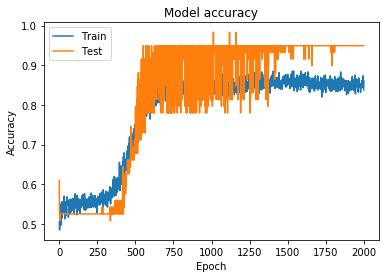

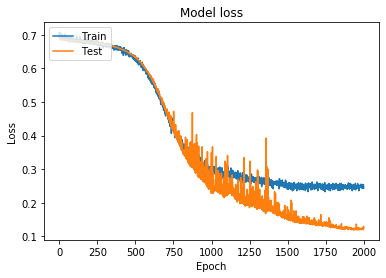

In [12]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()